In [1]:
import numpy as np

def load_mnist(path, kind):
    labels_path = f'{path}/{kind}-labels.idx1-ubyte'
    images_path = f'{path}/{kind}-images.idx3-ubyte'

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

# Load training data
X_train, y_train = load_mnist('IV_labs/mnist_data', kind='train')

# Load test data
X_test, y_test = load_mnist('IV_labs/mnist_data', kind='t10k')

In [2]:
print(y_train.shape)

(60000,)


In [3]:
import numpy as np
y_train=np.array(y_train).reshape(-1)

print(f'without one hot: {y_train}')  # for test set use y_test
print(f'without one hot: {y_train.shape}') 

y_one_hot = np.zeros((60000, 10)) # for test set use 10000 instead of 60000
y_one_hot[np.arange(60000), y_train] = 1
print(y_one_hot[0])
y_one_hot.shape

without one hot: [5 0 4 ... 5 6 8]
without one hot: (60000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

In [12]:
indices=np.arange(X_train.shape[0]) # for test set use X_test
np.random.shuffle(indices)
num_batches=60 # for test set num_batches = 10
batch_size=1000
X_mini_batches=[]
Y_mini_batches=[]
for i in range(num_batches):
    batch_indices=indices[i*batch_size:(i+1)*batch_size]
    X_mini_batches.append(X_train[batch_indices])
    Y_mini_batches.append(y_one_hot[batch_indices])
print(X_mini_batches[0].shape)
print(len(X_mini_batches))
print(len(Y_mini_batches[0]))



(1000, 784)
60
1000


In [13]:
Y.shape[0]

1000

Accuracy[0],epoch[0] :0.1050
Accuracy[1],epoch[0] :0.0930
Accuracy[2],epoch[0] :0.1070
Accuracy[3],epoch[0] :0.0990
Accuracy[4],epoch[0] :0.1110
Accuracy[5],epoch[0] :0.0750
Accuracy[6],epoch[0] :0.1190
Accuracy[7],epoch[0] :0.0990
Accuracy[8],epoch[0] :0.0890
Accuracy[9],epoch[0] :0.0920
Accuracy[10],epoch[0] :0.1060
Accuracy[11],epoch[0] :0.1100
Accuracy[12],epoch[0] :0.1110
Accuracy[13],epoch[0] :0.1090
Accuracy[14],epoch[0] :0.1140
Accuracy[15],epoch[0] :0.1080
Accuracy[16],epoch[0] :0.1220
Accuracy[17],epoch[0] :0.1000
Accuracy[18],epoch[0] :0.0820
Accuracy[19],epoch[0] :0.1050
Accuracy[20],epoch[0] :0.1030
Accuracy[21],epoch[0] :0.1130
Accuracy[22],epoch[0] :0.1030
Accuracy[23],epoch[0] :0.0980
Accuracy[24],epoch[0] :0.1160
Accuracy[25],epoch[0] :0.0920
Accuracy[26],epoch[0] :0.1070
Accuracy[27],epoch[0] :0.1080
Accuracy[28],epoch[0] :0.1070
Accuracy[29],epoch[0] :0.0900
Accuracy[30],epoch[0] :0.1230
Accuracy[31],epoch[0] :0.0880
Accuracy[32],epoch[0] :0.0980
Accuracy[33],epoch[0

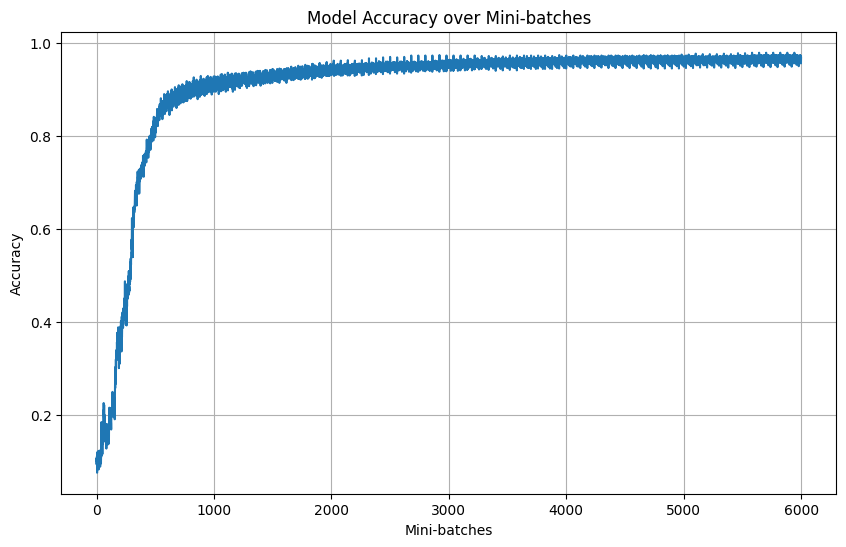

In [14]:
from matplotlib import pyplot as plt
import numpy as np

w1=np.random.randn(20,784)*0.01
b1=np.random.randn(20,1)

w2=np.random.randn(20,20)*0.01
b2=np.random.randn(20,1)

w3=np.random.randn(10,20)*0.01
b3=np.random.randn(10,1)

vdW1=0
vdW2=0
vdW3=0
vdB1=0
vdB2=0
vdB3=0
beta=0.9
acc=[]
iterations=[]

for j in range(100):
    
    for k in range(60): # for test set use 10 instead of 60
        
        X=X_mini_batches[k]
        
        mean=np.mean(X)
        std=np.std(X)
        #print(f'mean: {mean}')

        #print(f'std: {std}')

        X=(X-mean)/std
        #print(f'Normalized inputs: {X}')
        #print(X.shape)
        
        total_loss=0
        
        Y=Y_mini_batches[k]
        
        A1 = []
        A2 = []
        A3 = [] 
        
        for i in range(1000):
            
                       
            z1=np.dot(w1,X[i].reshape(784,1)) + b1
            a1=np.maximum(0,z1)
            A1.append(a1.reshape(1,20))

            z2=np.dot(w2,a1)+b2
            a2=np.maximum(0,z2)
            A2.append(a2.reshape(1,20))
        
            z3=np.dot(w3,a2)+b3
            a3=np.exp(z3)/np.sum(np.exp(z3),axis=0)       
            A3.append(a3.reshape(1,10))
         
            loss = -np.sum(Y[i]*np.log(a3+1e-8))         
            total_loss=total_loss+(loss)
            
        total_loss=total_loss/1000
        
        # l2_loss = (0.01/(2 * 1000)) * (np.sum(np.square(w1)) + np.sum(np.square(w2)) + np.sum(np.square(w3)))     
        final_loss=total_loss
        #print(f'loss{[k]},epoch{j}:{final_loss}')
                    
        A1 = np.array(A1)
        A2 = np.array(A2)
        A3 = np.array(A3)
        
        A3 = np.squeeze(A3, axis=1)
        A2 = np.squeeze(A2, axis=1)
        A1 = np.squeeze(A1, axis=1)

        predictions = np.argmax(A3, axis=1)
        true_labels = np.argmax(Y, axis=1)
        accuracy = np.mean(predictions == true_labels)

        print(f"Accuracy{[k]},epoch{[j]} :{accuracy:.4f}")
        acc.append(accuracy)
        iterations.append(j*60 + k)
               
       
        dZ3=A3-Y
        #print(f'shape of dZ3:- {dZ3.shape}')
    
        dW3=np.dot(dZ3.T,A2)/1000+(0.01/1000) * w3
        #print(f'shape of dW3:- {dW3.shape}')
    
        dB3=np.sum(dZ3, axis=0, keepdims=True).T / 1000
        #print(f'shape of dB3:- {dB3.shape}')

        dZ2=np.dot(dZ3,w3)*(A2>0)
        #print(f'shape of dZ2:- {dZ2.shape}')
    
        dW2=np.dot(dZ2.T,A1)/1000 + (0.01/1000) * w2
        #print(f'shape of dW2:- {dW2.shape}')
    
        dB2=np.sum(dZ2,axis=0,keepdims=True).T/1000
        #print(f'shape of dB1:-{dB2.shape}')
    

        dZ1=np.dot(dZ2,w2)*(A1>0)
        #print(f'shape of dZ1:- {dZ1.shape}')
    
        dW1=np.dot(dZ1.T,X)/1000 + (0.01/1000) * w1
        #print(f'shape of dW1:- {dW1.shape}')
    
        dB1=np.sum(dZ1,axis=0,keepdims=True).T/1000
        #print(f'shape of dB1:-{dB1.shape}')

        vdW1 = beta * vdW1 + (1 - beta) * dW1
        vdW2 = beta * vdW2 + (1 - beta) * dW2
        vdW3 = beta * vdW3 + (1 - beta) * dW3
        vdB1 = beta * vdB1 + (1 - beta) * dB1
        vdB2 = beta * vdB2 + (1 - beta) * dB2
        vdB3 = beta * vdB3 + (1 - beta) * dB3
        

        w3=w3-0.08*vdW3
        #print(f'shape of w3:- {w3.shape}')
     
        b3=b3-0.08*vdB3
        #print(f'shape of b3:- {b3.shape}')
        
        w2=w2-0.08*vdW2
        #print(f'shape of w2:- {w2.shape}')
     
        b2=b2-0.08*vdB2
        #print(f'shape of b2:- {b2.shape}')

        w1=w1-0.08*dW1
        #print(f'shape of w1:- {w1.shape}')
  
        b1=b1-0.08*dB1
        #print(f'shape of b1:- {b1.shape}')
   
plt.figure(figsize=(10, 6))
plt.plot(iterations, acc)
plt.title('Model Accuracy over Mini-batches')
plt.xlabel('Mini-batches')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
    
 
   


